# Loan Status Prediction 

## Introduction 

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
# reading the data

loan_data <- read_csv("Group Project/loan_data.csv")
loan_data


# the csv file is in different columns, but it says delim - , so i did .csv but do i have to do smtg else?
# i can also change the delim so should i use read_delim or keep read_csv?
# is the data already tidy? i think so 

Rows: 381 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Pro...
dbl (5): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N


hello

Loan_Status,Number_of_Observations
<chr>,<int>
N,82
Y,203


ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
<dbl>,<dbl>,<dbl>,<dbl>
3610.821,1098.975,105.3228,343.5269


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


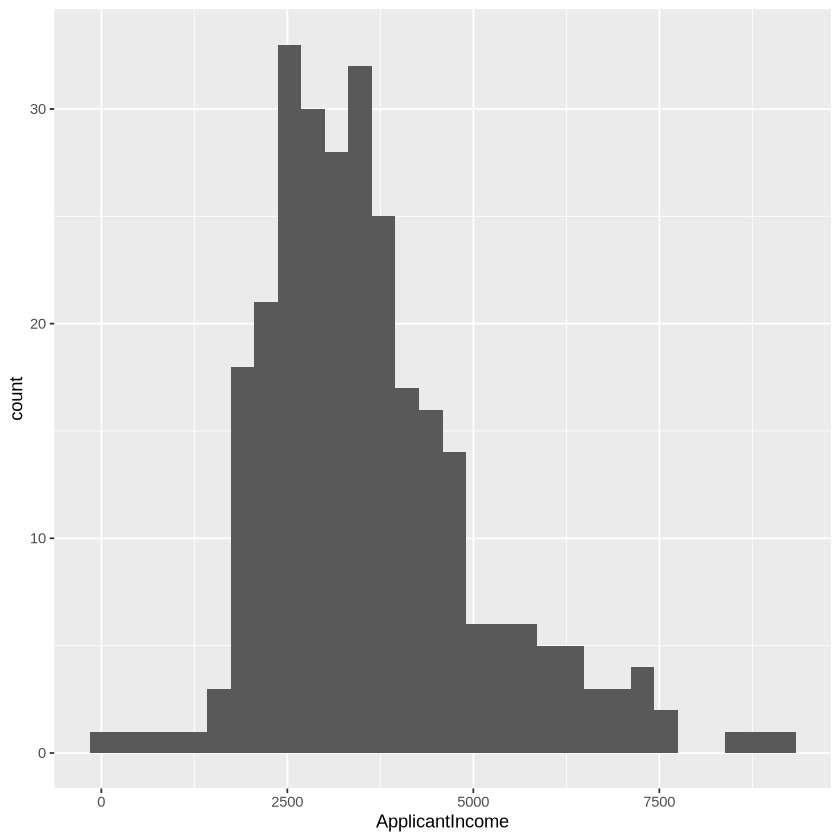

In [13]:
# splitting between training and testing sets 

loan_split <- initial_split(loan_data, prop = 0.75, strata = Loan_Status) 
loan_training <- training(loan_split) 
loan_testing <- testing(loan_split) 

# exploratory data analysis (table) 

loan_counts <- loan_training |>
    group_by(Loan_Status) |>
    summarise(Number_of_Observations = n())
loan_counts

loan_means <- loan_training |> 
    select(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) |>
    map_dfr(mean, na.rm = TRUE) 
loan_means

# exploratory data analysis (plots) 

loan_distributions <- loan_training |>
    ggplot(aes(x = ApplicantIncome)) +
    geom_histogram() 
loan_distributions